In [1]:
import numpy as np
import cv2
import pandas as pd
import os
import matplotlib.pyplot as plt
from PIL import Image
import imutils
import torch
from torchvision import transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import ImageFolder

In [ ]:
angles = np.linspace(0, 360, 90)
angles

In [ ]:
free_path = "D:\\parkingi\\free_path"
x = 0
for i in os.listdir(free_path):
    for j in angles:
        
        imgi = path + "\\" + i
        img = cv2.imread(imgi)
        
        rotated_img = imutils.rotate(img, j)
        #img = transforms.RandomRotation(j)
        
        x += 1
        cv2.imwrite(f"D:\\parkingi\\rotated_free\\{x}.jpg", rotated_img)

In [ ]:
busy_path = path = "D:\\parkingi\\busy"
y = 0
for i in os.listdir(busy_path):
    for j in angles:
        
        imgi = path + "\\" + i
        img = cv2.imread(imgi)
        
        rotated_img = imutils.rotate(img, j)
        #img = transforms.RandomRotation(j)
        
        y += 1
        cv2.imwrite(f"D:\\parkingi\\rotated_busy\\{y}.jpg", rotated_img)

In [ ]:
angles = [90, 180, -90]

In [ ]:
path1 = "D:\\parkingi\\busy\\zajete"
path2 = "D:\\parkingi\\free\\puste"

In [ ]:
y = 0

for i in os.listdir(path1):
    path = path1 + "\\" + i
    imgi = cv2.imread(path)
    
    img = cv2.resize(imgi, [85, 150])
    
    cv2.imwrite(f"D:\\parkingi\\busy\\{y}.jpg", img)
    y += 1
    
    for j in angles:
        
        rotated_img = imutils.rotate(img, j)
        
        cv2.imwrite(f"D:\\parkingi\\busy\\{y}.jpg", rotated_img)
        y += 1

y = 0
        
for i in os.listdir(path2):
    path = path2 + "\\" + i
    imgi = cv2.imread(path)
    
    img = cv2.resize(imgi, [85, 150])
    
    cv2.imwrite(f"D:\\parkingi\\free\\{y}.jpg", img)
    y += 1
    
    for j in angles:
        
        rotated_img = imutils.rotate(img, j)
        
        cv2.imwrite(f"D:\\parkingi\\free\\{y}.jpg", rotated_img)
        y += 1  

In [ ]:
path1 = "D:\\parkingi\\busy"
path2 = "D:\\parkingi\\free"

In [ ]:
X = []
for i in os.listdir(path1):
    path = path1 + "\\" + i
    img = cv2.imread(path)
    
    
    X.append(img)
    
    
for i in os.listdir(path2):
    path = path2 + "\\" + i
    img = cv2.imread(path)
    
    X.append(img)

In [2]:
data_transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=[0.5], std=[0.5]), transforms.Resize((227, 227))])

In [3]:
test_transform = transforms.Compose([transforms.ToTensor()])

In [4]:
batch_size = 8
train_path = "D:\\parkingi\\parkingi_train"
test_path = "D:\\parkingi\\parkingi_test"
train_dataset = ImageFolder(train_path, transform=data_transform)
test_dataset = ImageFolder(test_path, transform=data_transform)
train_dataloader = DataLoader(dataset=train_dataset, drop_last=True, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)



In [ ]:
next(iter(test_dataloader))[0].shape

In [1]:
class AlexNet(nn.Module):
    def __init__(self, num_classes=2):
        super(AlexNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=0),
            nn.BatchNorm2d(96),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(96, 256, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2))
        self.layer3 = nn.Sequential(
            nn.Conv2d(256, 384, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(384),
            nn.ReLU())
        self.layer4 = nn.Sequential(
            nn.Conv2d(384, 384, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(384),
            nn.ReLU())
        self.layer5 = nn.Sequential(
            nn.Conv2d(384, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=1, padding=1))
        self.fc = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(256*13*13, 4096),
            nn.ReLU())
        self.fc1 = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU())
        self.fc2 = nn.Sequential(
            nn.Linear(4096, num_classes))
            
    def forward(self, x):
            out = self.layer1(x)
            out = self.layer2(out)
            out = self.layer3(out)
            out = self.layer4(out)
            out = self.layer5(out)
            out = out.reshape(out.size(0), -1)
            out = self.fc(out)
            out = self.fc1(out)
            out = self.fc2(out)
            return out

NameError: name 'nn' is not defined

In [28]:
modelx = AlexNet()

In [29]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(modelx.parameters(), lr=0.005, weight_decay = 0.005, momentum = 0.9)

In [30]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X_train, y_train) in enumerate(dataloader):
        pred = model(X_train)
        loss = loss_fn(pred, y_train)
        
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X_train)
            print(f"loss: {loss:>7f} [{current:>5d}/{size:>5d}]")

In [31]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [32]:
epochs = 100
for i in range(epochs):
    print(f"Epoch {i+1}\n---------------------")
    train(train_dataloader, modelx, criterion, optimizer)
    test(test_dataloader, modelx, criterion)
    
print("Done")

Epoch 1
---------------------


C:\Users\stadn\anaconda3\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


loss: 0.704933 [    8/  609]
Test Error: 
 Accuracy: 37.8%, Avg loss: 23.792963 

Epoch 2
---------------------
loss: 3.972389 [    8/  609]
Test Error: 
 Accuracy: 81.1%, Avg loss: 0.313819 

Epoch 3
---------------------
loss: 0.354373 [    8/  609]
Test Error: 
 Accuracy: 96.1%, Avg loss: 0.145978 

Epoch 4
---------------------
loss: 0.099317 [    8/  609]
Test Error: 
 Accuracy: 99.2%, Avg loss: 0.045950 

Epoch 5
---------------------
loss: 0.012324 [    8/  609]
Test Error: 
 Accuracy: 100.0%, Avg loss: 0.009414 

Epoch 6
---------------------
loss: 0.016877 [    8/  609]
Test Error: 
 Accuracy: 100.0%, Avg loss: 0.009887 

Epoch 7
---------------------
loss: 0.000826 [    8/  609]
Test Error: 
 Accuracy: 98.4%, Avg loss: 0.041704 

Epoch 8
---------------------
loss: 0.003382 [    8/  609]
Test Error: 
 Accuracy: 98.4%, Avg loss: 0.029782 

Epoch 9
---------------------
loss: 0.012235 [    8/  609]
Test Error: 
 Accuracy: 98.4%, Avg loss: 0.038323 

Epoch 10
-------------------

In [33]:
torch.save(model.state_dict(), "model_alex.pth")

In [55]:
torch.save(model.state_dict(), "model_chyba_dobry.pth")

In [5]:
import os    
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [180]:
len(test_dataloader.dataset)

127

In [76]:
path = "D:\\parkingi\\test"
data_transform = transforms.Compose(transforms.Resize([85, 150]))
test = ImageFolder(path)

loader = DataLoader(dataset=test)

In [5]:
import os    
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

(150, 85, 3)


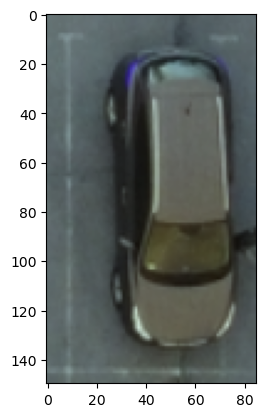

In [7]:
img = cv2.imread("D:\\parkingi\\test.png")
imgi = cv2.resize(img, [85, 150])
plt.imshow(imgi)

image = transforms.ToTensor()
image(imgi)
print(imgi.shape)

In [17]:
model = ConvNet()
model.load_state_dict(torch.load("model_chyba_dobry.pth"))

<All keys matched successfully>

In [18]:
for x, y in test_dataset:
    with torch.no_grad():
        pred = model(x)

        predicted, actual = pred, y
        print(predicted, actual)

C:\Users\stadn\AppData\Local\Temp\ipykernel_25076\3034464966.py:26: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.soft(x)


tensor([[9.9918e-01, 8.1879e-04]]) 0
tensor([[9.9907e-01, 9.2668e-04]]) 0
tensor([[0.9914, 0.0086]]) 0
tensor([[9.9905e-01, 9.4623e-04]]) 0
tensor([[0.9867, 0.0133]]) 0
tensor([[9.9996e-01, 3.7344e-05]]) 0
tensor([[9.9973e-01, 2.7098e-04]]) 0
tensor([[0.9989, 0.0011]]) 0
tensor([[9.9963e-01, 3.7495e-04]]) 0
tensor([[0.9979, 0.0021]]) 0
tensor([[9.9959e-01, 4.0798e-04]]) 0
tensor([[9.9906e-01, 9.4218e-04]]) 0
tensor([[0.9898, 0.0102]]) 0
tensor([[9.9932e-01, 6.8332e-04]]) 0
tensor([[0.9980, 0.0020]]) 0
tensor([[0.9968, 0.0032]]) 0
tensor([[0.9987, 0.0013]]) 0
tensor([[0.9940, 0.0060]]) 0
tensor([[0.9670, 0.0330]]) 0
tensor([[0.9916, 0.0084]]) 0
tensor([[9.9995e-01, 4.8954e-05]]) 0
tensor([[0.9977, 0.0023]]) 0
tensor([[9.9994e-01, 6.0428e-05]]) 0
tensor([[9.9964e-01, 3.5892e-04]]) 0
tensor([[0.9963, 0.0037]]) 0
tensor([[0.9898, 0.0102]]) 0
tensor([[9.9993e-01, 7.2265e-05]]) 0
tensor([[9.9967e-01, 3.3017e-04]]) 0
tensor([[9.9957e-01, 4.2603e-04]]) 0
tensor([[9.9977e-01, 2.3433e-04]]) 0
te